# Towards Max Entropy with Multinomial distribution 

This notebook creates a few figures used in preparation for the Wallis derivation

First version: 10/30/2025

This version: 10/30/2025

https://northeastern-datalab.github.io/cs7840/fa25/calendar.html

## 1. Multinomial distribution on the 3-simplex

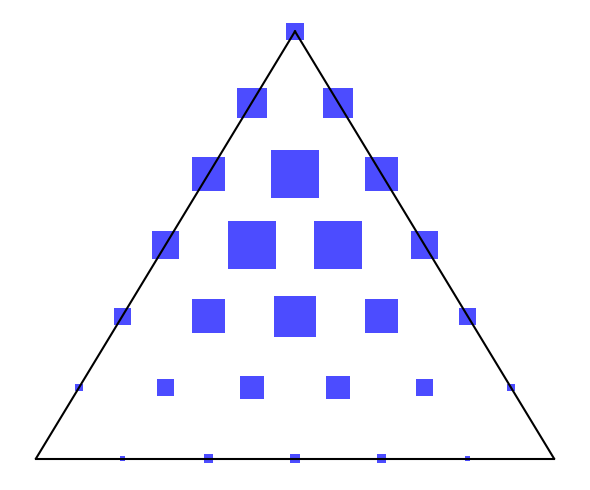

In [12]:
# Multinomial simplex plot (n=6, p=(0.25, 0.25, 0.50))
# - Each lattice point (x, y, z) with x+y+z=6 is plotted on the 2D simplex
# - Marker is a filled blue square; marker AREA (not diameter!) is proportional to probability
# - Triangle edges are black; axes are hidden
# - An additional option allows to specify a constraint on the sum of the draws

import math
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1) Problem setup
# Choose different setup constraints
# ----------------------------
CASE = 1

if CASE == 1:
    n = 6
    pA, pB, pC = 0.25, 0.25, 0.50
    COND = False

elif CASE == 2:
    n = 6
    pA, pB, pC = 0.25, 0.25, 0.50
    COND = 10   # optional constraint on the sum of the draws

elif CASE == 3:
    n = 8       # changing 6 to 8, to make the optimal unconstrained point visible (0.25, 0.25, 0.5)
    pA, pB, pC = 0.25, 0.25, 0.50
    COND = False
    
elif CASE == 4:
    n = 8
    pA, pB, pC = 0.25, 0.25, 0.50
    COND = 20   # optional constraint on the sum of the draws


# ----------------------------
# 2) Enumerate all outcomes and probabilities
# ----------------------------
triples = []      # list of (x, y, z)
probs = []        # list of P(X=x, Y=y, Z=z)

for x in range(n + 1):
    for y in range(n + 1 - x):
        z = n - x - y
        coeff = math.factorial(n) // (math.factorial(x) * math.factorial(y) * math.factorial(z))
        prob = coeff * (pA ** x) * (pB ** y) * (pC ** z)
        
        # --- check that a condition holds
        if COND:
            if not COND == 1*x+2*y+3*z:
                prob = 0
                
        triples.append((x, y, z))
        probs.append(prob)

triples = np.array(triples)
probs = np.array(probs)


# ----------------------------
# 3) Map barycentric (a,b,c) to 2D coordinates of an equilateral triangle
#    Vertices: A=(0,0), B=(1,0), C=(0.5, sqrt(3)/2)
#    Use normalized counts (x,y,z)/n as barycentric weights.
# ----------------------------
sqrt3 = np.sqrt(3)
A_v = np.array([0.0, 0.0])
B_v = np.array([1.0, 0.0])
C_v = np.array([0.5, sqrt3 / 2])

a = triples[:, 0] / n
b = triples[:, 1] / n
c = triples[:, 2] / n

points = (a[:, None] * A_v) + (b[:, None] * B_v) + (c[:, None] * C_v)
xs, ys = points[:, 0], points[:, 1]


# ----------------------------
# 4) Marker areas proportional to probability
#    Matplotlib's scatter 's' argument is marker AREA in points^2.
#    Scale probabilities by manual tweaking
# ----------------------------
MAX_MARKER_AREA = 10000.0       # tweak if you want bigger/smaller squares
sizes = MAX_MARKER_AREA * probs 
# MAX_MARKER_AREA = 800.0   # tweak if you want bigger/smaller squares
# sizes = MAX_MARKER_AREA * (probs / probs.max())  # area ∝ probability


# ----------------------------
# 5) Plot
# ----------------------------
plt.figure(figsize=(6, 5))

# Filled blue squares (alpha for slight translucency)
plt.scatter(xs, ys, s=sizes, c='blue', marker='s', alpha=0.7, edgecolors='none')

# Triangle outline in black
plt.plot([A_v[0], B_v[0]], [A_v[1], B_v[1]], color='black')
plt.plot([B_v[0], C_v[0]], [B_v[1], C_v[1]], color='black')
plt.plot([C_v[0], A_v[0]], [C_v[1], A_v[1]], color='black')

plt.axis('off')
plt.tight_layout()
plt.show()


## 2. Binomial vs. Poission vs. Gaussian distribution

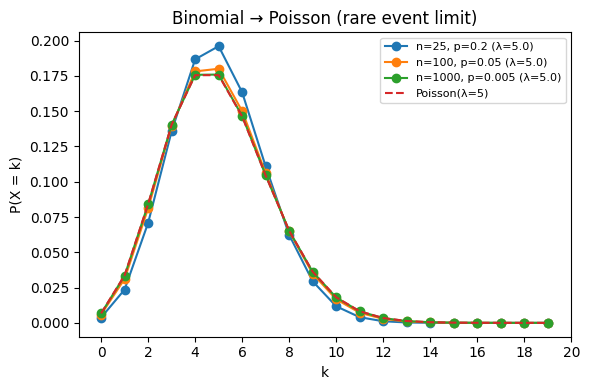

In [22]:
# Connections among Binomial, Poisson, and Gaussian (Normal)
# Creates 4 separate figures and saves each as a PNG.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, norm


# -------------------------------
# 1) Binomial → Poisson (rare event limit)
# -------------------------------
n_values = [25, 100, 1000]
p_values = [0.2, 0.05, 0.005]  # each with λ = 5, 5, 5 respectively
x = np.arange(0, 20)

fig1 = plt.figure(figsize=(6, 4))
ax1 = plt.gca()

for n, p in zip(n_values, p_values):
    lam = n * p
    ax1.plot(x, binom.pmf(x, n, p), marker='o', linestyle='-', label=f'n={n}, p={p} (λ={lam:.1f})')

ax1.plot(x, poisson.pmf(x, 5), linestyle='--', label='Poisson(λ=5)')
ax1.set_title("Binomial → Poisson (rare event limit)")
ax1.set_xlabel("k")
ax1.set_ylabel("P(X = k)")
ax1.legend(fontsize=8)
ax1.set_xticks(np.arange(0, 21, 2))
fig1.tight_layout()
plt.show()

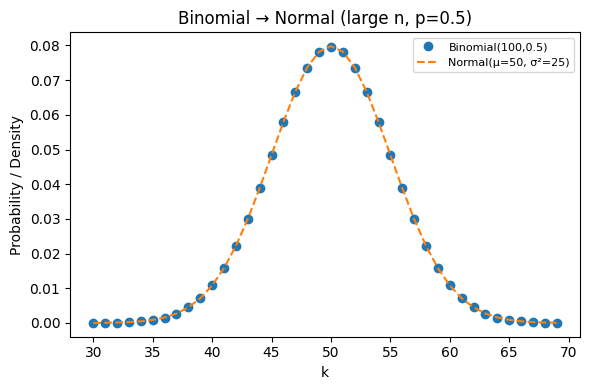

In [19]:
# -------------------------------
# 2) Binomial → Normal (large n, moderate p)
# -------------------------------
n = 100
p = 0.5
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
x = np.arange(30, 70)

fig2 = plt.figure(figsize=(6, 4))
ax2 = plt.gca()

ax2.plot(x, binom.pmf(x, n, p), marker='o', linestyle='none', label=f"Binomial({n},{p})")
ax2.plot(x, norm.pdf(x, mu, sigma), linestyle='--', label=f"Normal(μ={mu:.0f}, σ²={(sigma**2):.0f})")

ax2.set_title("Binomial → Normal (large n, p=0.5)")
ax2.set_xlabel("k")
ax2.set_ylabel("Probability / Density")
ax2.legend(fontsize=8)
fig2.tight_layout()
plt.show()


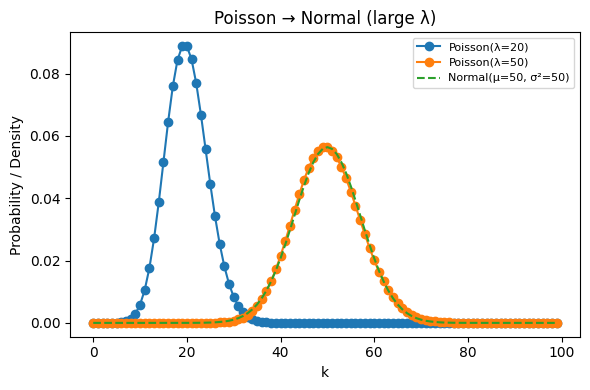

In [26]:
# -------------------------------
# 3) Poisson → Normal (large λ)
# -------------------------------
lambdas = [20, 50]
x = np.arange(0, 100)

fig3 = plt.figure(figsize=(6, 4))
ax3 = plt.gca()

for lam in lambdas:
    ax3.plot(x, poisson.pmf(x, lam), marker='o', linestyle='-', label=f'Poisson(λ={lam})')

ax3.plot(x, norm.pdf(x, 50, np.sqrt(50)), linestyle='--', label='Normal(μ=50, σ²=50)')

ax3.set_title("Poisson → Normal (large λ)")
ax3.set_xlabel("k")
ax3.set_ylabel("Probability / Density")
ax3.legend(fontsize=8)
fig3.tight_layout()
plt.show()


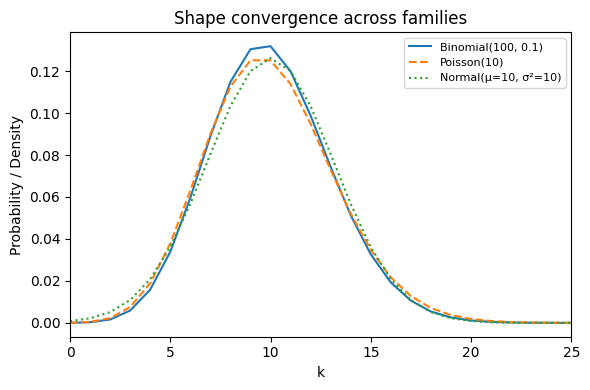

In [28]:
# -------------------------------
# 4) Shape convergence across families
# -------------------------------
x = np.arange(0, 40)

fig4 = plt.figure(figsize=(6, 4))
ax4 = plt.gca()

ax4.plot(x, binom.pmf(x, 100, 0.1), linestyle='-', label='Binomial(100, 0.1)')
ax4.plot(x, poisson.pmf(x, 10), linestyle='--', label='Poisson(10)')
ax4.plot(x, norm.pdf(x, 10, np.sqrt(10)), linestyle=':', label='Normal(μ=10, σ²=10)')

ax4.set_title("Shape convergence across families")
ax4.set_xlabel("k")
ax4.set_ylabel("Probability / Density")
ax4.legend(fontsize=8)
ax4.set_xlim(0, 25)
fig4.tight_layout()
plt.show()